In [61]:
import reverse_geocoder as rg
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
df = pd.read_csv('../Data/MarineMicroplastics.csv')

df.head()

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,Density Class,Sampling Method,Short Reference,DOI,Organization,Keywords,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,40055,4/3/2011 12:00:00 AM,-30.241300,-97.094800,Pacific Ocean,NaN,NaN,0.390376,pieces/m3,0.005-1,Medium,Neuston net,Eriksen et al.2014,https://doi.org/10.1371/journal.pone.0111913,5 Gyres Institute,SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Am...,275968,https://www.ncei.noaa.gov/access/metadata/land...,4078602b-702b-4514-b625-4b08fb50d16c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.080854e+07,-3.534605e+06
1,39794,11/27/2010 12:00:00 AM,-33.572900,-13.705700,Atlantic Ocean,NaN,NaN,0.976803,pieces/m3,0.005-1,Medium,Neuston net,Eriksen et al.2014,https://doi.org/10.1371/journal.pone.0111913,5 Gyres Institute,SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Am...,275968,https://www.ncei.noaa.gov/access/metadata/land...,fff505a7-d6da-435d-9b6e-8263bf448e78,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.525712e+06,-3.971596e+06
2,41383,11/22/2018 12:00:00 AM,-34.106500,23.215333,Indian Ocean,NaN,NaN,0.025293,pieces/m3,0.005-1,Medium,Manta net,Faure et al.2015,https://doi.org/10.1007/s11356-015-4453-3,"Oceaneye Association, Switzerland",Oceaneye Association; Citizen Science,276422,https://www.ncei.noaa.gov/access/metadata/land...,da11404d-fe3c-4dff-9987-8a81d0ce54d9,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",2.584319e+06,-4.043111e+06
3,41122,9/8/2016 12:00:00 AM,-19.952167,-157.687167,Pacific Ocean,NaN,NaN,0.013095,pieces/m3,0.005-1,Medium,Manta net,Faure et al.2015,https://doi.org/10.1007/s11356-015-4453-3,"Oceaneye Association, Switzerland",Oceaneye Association; Citizen Science,276422,https://www.ncei.noaa.gov/access/metadata/land...,c0f493d3-1fcc-4db2-b749-4e77a23d637c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Faure, F., C. Saini, G. Potter, F. Galgani, L....",-1.755366e+07,-2.267365e+06
4,35217,4/6/2005 12:00:00 AM,2.190000,-135.730000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,Neuston net,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05


In [ ]:
df['Unit'].value_counts()

## Reverse GeoCoder Function

``` Python
def fill_missing_region_subregion(row):
    if pd.isnull(row['region']) or pd.isnull(row['sub_region']):
        coordinates = (row['latitude'], row['longitude'])
        result = rg.search(coordinates)[0]
        row['region'] = row['region'] if pd.notnull(row['region']) else result['admin1']
        row['sub_region'] = row['sub_region'] if pd.notnull(row['sub_region']) else result['admin2']
    return row

# Apply the function to each row of the dataset
data = data.apply(fill_missing_region_subregion, axis=1)
```

### Geo Py

``` python
geolocator = Nominatim(user_agent="your_app_name")

def fill_missing_region_subregion(row):
    if pd.isnull(row['region']) or pd.isnull(row['sub_region']):
        coordinates = (row['latitude'], row['longitude'])

        try:
            location = geolocator.reverse(coordinates, timeout=10)
        except GeocoderTimedOut:
            return row

        if location and location.raw:
            address = location.raw.get('address', {})
            row['region'] = row['region'] if pd.notnull(row['region']) else address.get('state')
            row['sub_region'] = row['sub_region'] if pd.notnull(row['sub_region']) else address.get('county')

    return row

# Apply the function to each row of the dataset
data = data.apply(fill_missing_region_subregion, axis=1)
```

In [ ]:
df.loc[df['Measurement'] > 6000, 'Measurement']

In [ ]:
df2 = df.drop(3843)
df2 = df2.drop(7408)
df2 = df2.drop(921)

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(df2[df2['Measurement'] > 10], bins=100)
plt.title('Measurement Distribution')
plt.show;

In [ ]:
df2['Measurement'][df['Measurement']>10].plot(kind='hist')

In [46]:
df['Sampling Method'].value_counts()

Neuston net               9708
Manta net                 2548
Grab sample               1389
Intake seawater             90
Stainless steel bucket      69
Aluminum bucket             57
Plankton net                40
AVANI net                   36
Surface water intake         5
Name: Sampling Method, dtype: int64

In [55]:
df.groupby('Sampling Method')['Measurement'].describe()

,count,mean,std,min,25%,50%,75%,max
Sampling Method,,,,,,,,
AVANI net,36.0,0.117038,0.279832,0.005113,0.019015,0.062537,0.111311,1.713479
Aluminum bucket,57.0,2089.859649,1341.990835,703.000000,1083.000000,1710.000000,2635.333333,7650.333333
Grab sample,1389.0,0.012778,0.027354,0.000000,0.001000,0.005000,0.012000,0.323000
Intake seawater,90.0,41.988889,52.116226,0.000000,12.250000,27.500000,47.500000,349.000000
Manta net,2548.0,1.963833,7.635684,0.000000,0.078710,0.453666,1.664404,324.000000
Neuston net,9708.0,0.118081,0.810381,0.000000,0.000000,0.002700,0.021600,49.267784
Plankton net,40.0,0.539250,0.195361,0.190000,0.420000,0.525000,0.635000,1.020000
Stainless steel bucket,69.0,998.014493,430.774081,411.000000,719.000000,924.000000,1104.000000,2233.000000
Surface water intake,5.0,15828.000000,23683.013850,1580.000000,3405.000000,5015.000000,11475.000000,57665.000000


In [56]:
df.groupby('Density Range')['Measurement'].describe()

,count,mean,std,min,25%,50%,75%,max
Density Range,,,,,,,,
0-0.0005,4420.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0005-0.005,1931.0,0.002853,0.001083,0.000676,0.002160,0.002400,0.004000,0.004984
0.005-1,6257.0,0.131531,0.212719,0.005000,0.012000,0.033000,0.133389,0.996410
1-10,1032.0,3.143628,2.120489,1.000613,1.526510,2.413144,4.102028,9.972925
>=10,302.0,904.056233,3497.048707,10.000000,19.147215,58.500000,1040.500000,57665.000000


In [57]:
df.groupby('Density Class')['Measurement'].describe()

,count,mean,std,min,25%,50%,75%,max
Density Class,,,,,,,,
High,1032.0,3.143628,2.120489,1.000613,1.526510,2.413144,4.102028,9.972925
Low,1931.0,0.002853,0.001083,0.000676,0.002160,0.002400,0.004000,0.004984
Medium,6257.0,0.131531,0.212719,0.005000,0.012000,0.033000,0.133389,0.996410
Very High,302.0,904.056233,3497.048707,10.000000,19.147215,58.500000,1040.500000,57665.000000
Very Low,4420.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
df.groupby('Density Class')['Density Range'].describe()

,count,unique,top,freq
Density Class,,,,
High,1032,1,1-10,1032
Low,1931,1,0.0005-0.005,1931
Medium,6257,1,0.005-1,6257
Very High,302,1,>=10,302
Very Low,4420,1,0-0.0005,4420


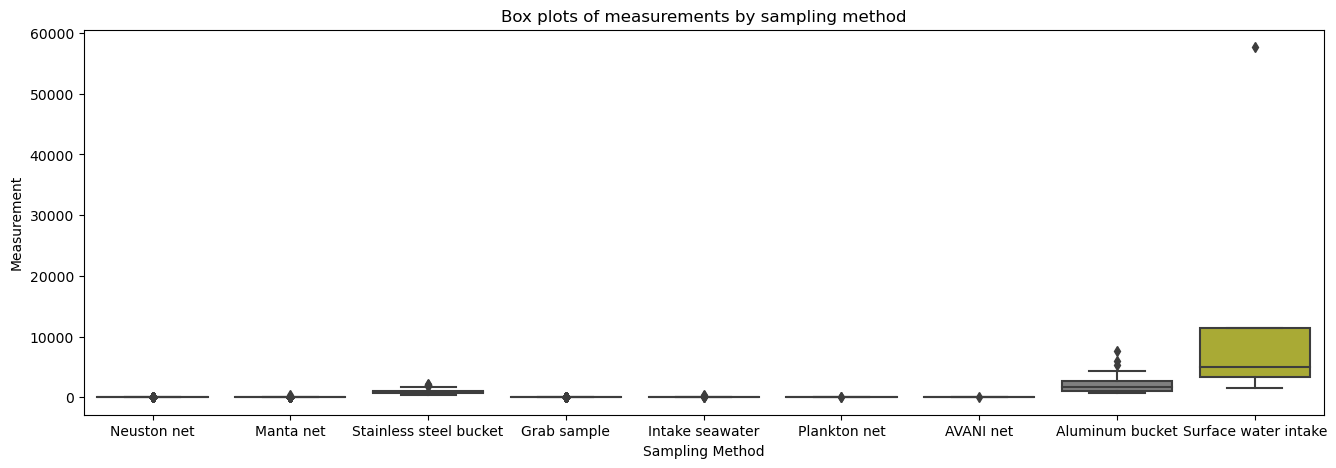

In [68]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Sampling Method', y='Measurement', data=df)
plt.title('Box plots of measurements by sampling method')
plt.show()

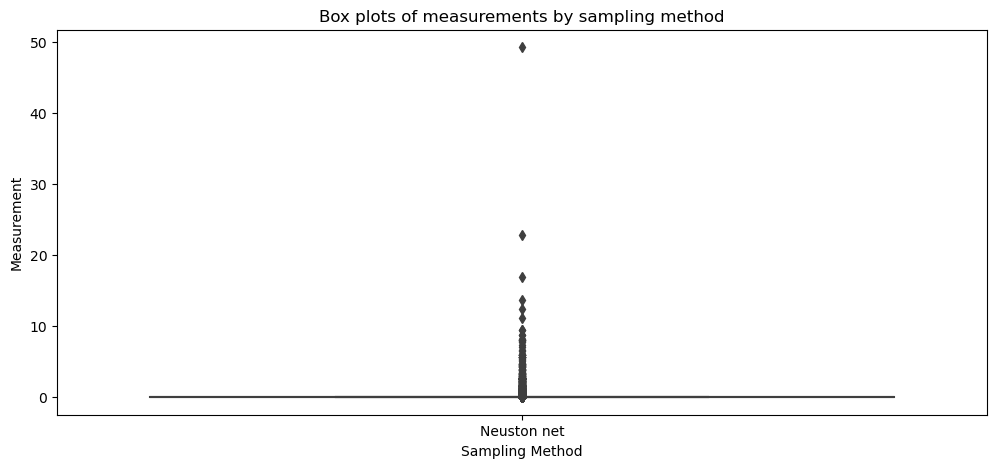

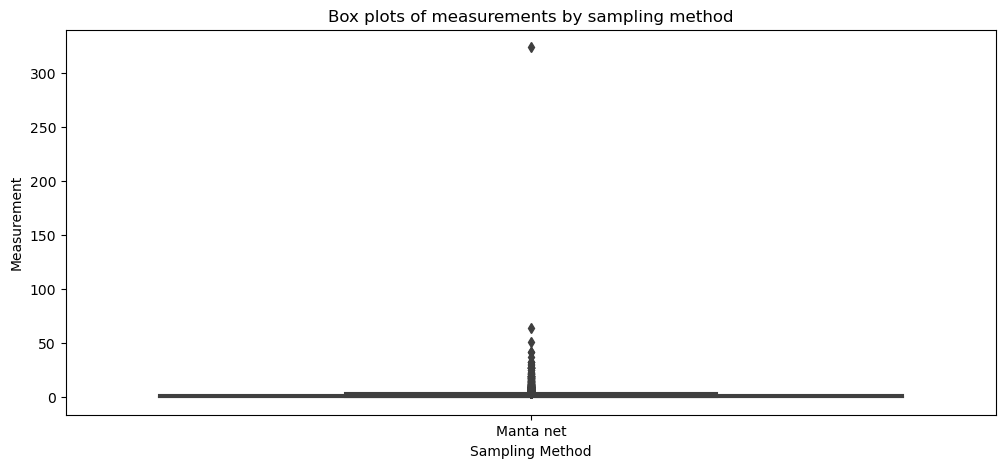

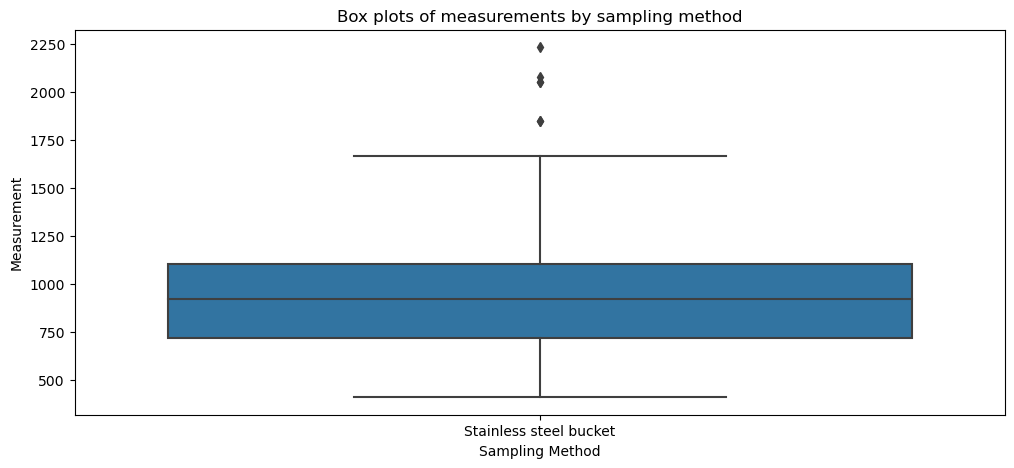

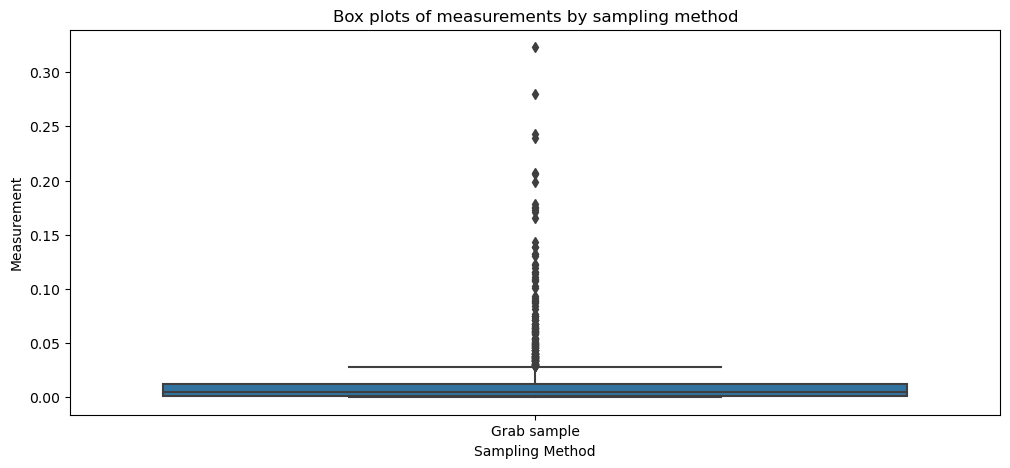

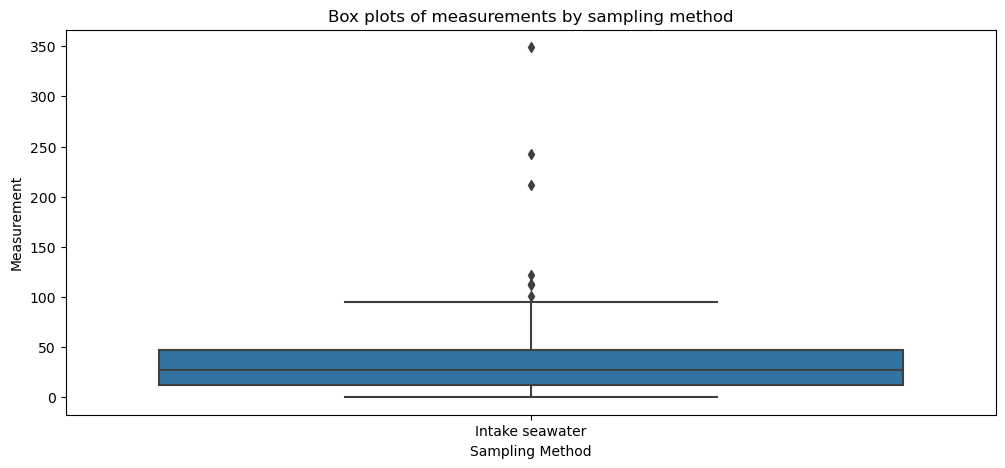

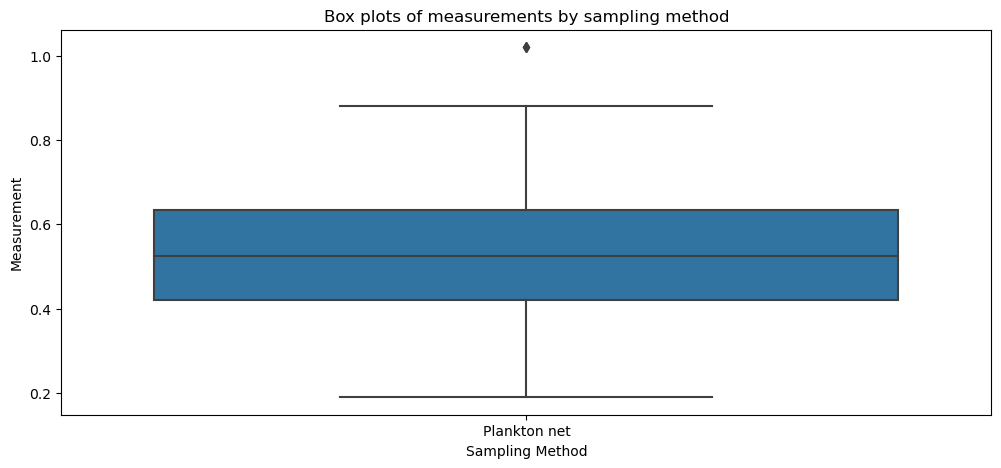

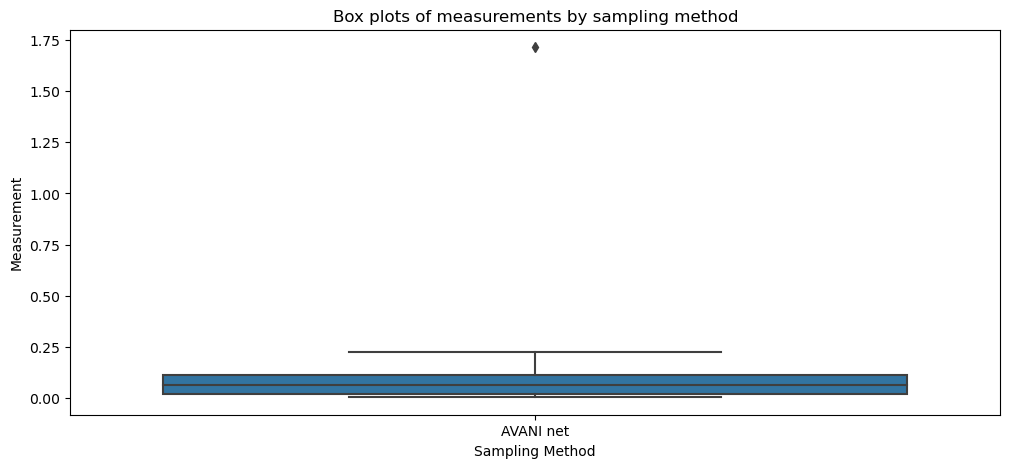

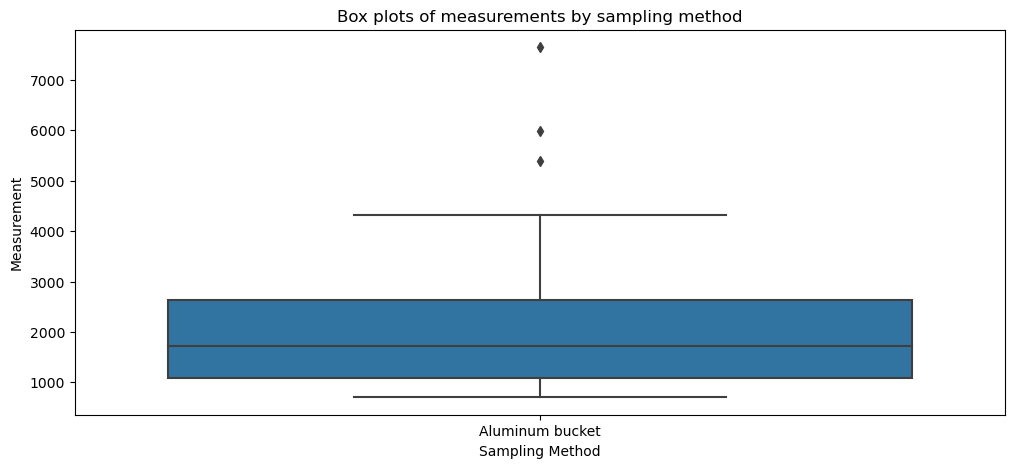

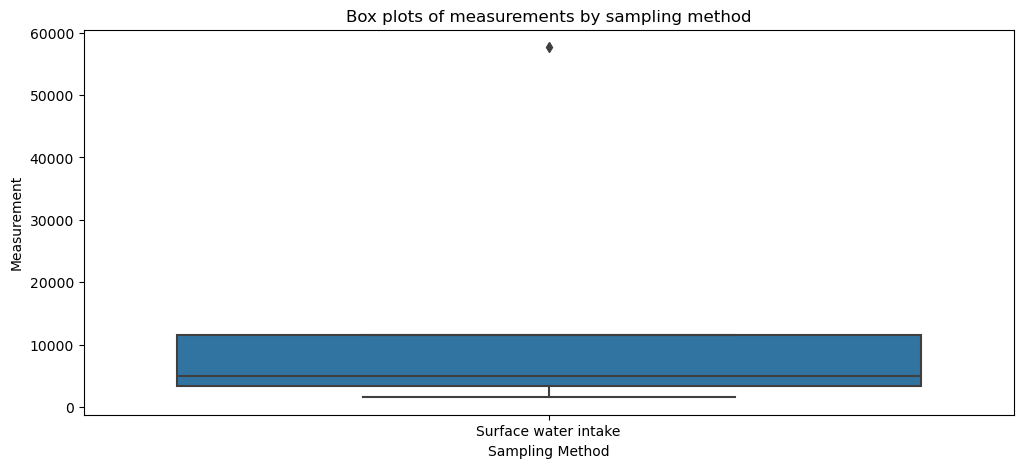

In [70]:
methods = df['Sampling Method'].unique()

for method in methods:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='Sampling Method', y='Measurement', data=df[df['Sampling Method'] == method])
    plt.title('Box plots of measurements by sampling method')
    plt.show()